In [1]:
import requests
import json
import pandas as pd
import pymongo
import time
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
from pymongo import MongoClient
client = MongoClient()
db = client.RiotAPI

challenger_user_collection = db.league_challenger_user
challenger_accId_collection = db.challenger_accId
challenger_gameId_collection = db.challenger_gameId
challenger_gameData_collection = db.challenger_gameData

In [66]:
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [40]:
%config InlineBackend.figure_format = 'retina'

In [5]:
chal_league_df = pd.DataFrame(challenger_gameData_collection.find())
chal_league_df

,_id,gameId,platformId,gameCreation,gameDuration,queueId,mapId,seasonId,gameVersion,gameMode,gameType,teams,participants,participantIdentities,status
0,60781227eff50a6c3c40dc98,5.132032e+09,KR,1.618478e+12,1379.0,420.0,11.0,13.0,11.8.370.4668,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
1,60781229eff50a6c3c40dc99,5.131928e+09,KR,1.618475e+12,1004.0,420.0,11.0,13.0,11.8.370.4668,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
2,6078122beff50a6c3c40dc9a,5.131994e+09,KR,1.618473e+12,1204.0,420.0,11.0,13.0,11.8.370.4668,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
3,6078122deff50a6c3c40dc9b,5.131098e+09,KR,1.618416e+12,1192.0,420.0,11.0,13.0,11.8.369.4139,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Fail', 'firstBlood': ...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
4,6078122feff50a6c3c40dc9c,5.131013e+09,KR,1.618413e+12,1652.0,420.0,11.0,13.0,11.8.369.4139,CLASSIC,MATCHED_GAME,"[{'teamId': 100, 'win': 'Win', 'firstBlood': F...","[{'participantId': 1, 'teamId': 100, 'champion...","[{'participantId': 1, 'player': {'platformId':...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27988,6078e27beff50a6c3c4149ec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'message': 'Forbidden', 'status_code': 403}"
27989,6078e27deff50a6c3c4149ed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'message': 'Forbidden', 'status_code': 403}"
27990,6078e27feff50a6c3c4149ee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'message': 'Forbidden', 'status_code': 403}"
27991,6078e280eff50a6c3c4149ef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'message': 'Forbidden', 'status_code': 403}"


<AxesSubplot:>

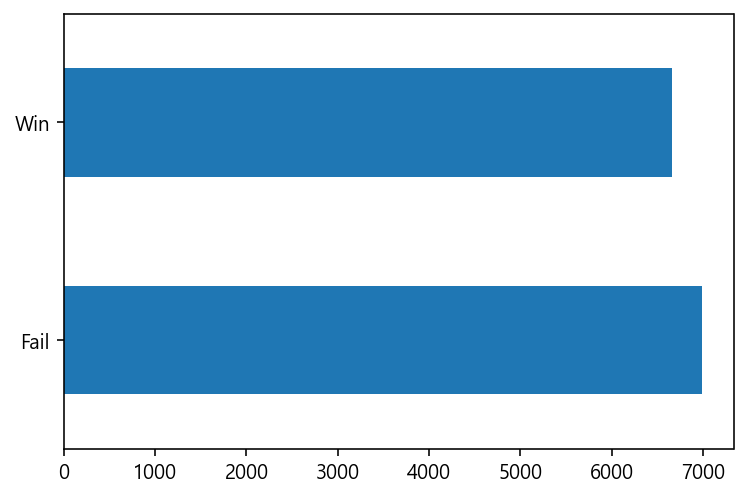

In [6]:
chal_league_df.isnull().sum()
chal_league_df = chal_league_df.drop(columns=['status'],axis=1)
chal_league_df = chal_league_df.dropna()
chal_league_df = chal_league_df.drop_duplicates(['gameId'])
chal_teams_df = pd.DataFrame(dict(chal_league_df['teams'])).T
chal_teams_df = pd.concat([chal_league_df, chal_teams_df[0]], axis=1)
chal_teams_df = pd.DataFrame(dict(chal_teams_df[0])).T
chal_teams_df['win'].value_counts().plot.barh()

In [7]:
chal_teams_df

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,vilemawKills,riftHeraldKills,dominionVictoryScore,bans
0,100,Fail,True,True,False,False,False,True,2,0,0,1,0,1,0,"[{'championId': 238, 'pickTurn': 1}, {'champio..."
1,100,Fail,False,False,False,False,True,False,0,0,0,1,0,0,0,"[{'championId': 39, 'pickTurn': 1}, {'champion..."
2,100,Win,False,True,True,False,False,True,10,1,0,0,0,2,0,"[{'championId': 76, 'pickTurn': 1}, {'champion..."
3,100,Fail,False,False,False,False,False,False,1,0,0,0,0,0,0,"[{'championId': 145, 'pickTurn': 1}, {'champio..."
4,100,Win,False,True,True,True,False,False,6,1,1,1,0,1,0,"[{'championId': 223, 'pickTurn': 1}, {'champio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27792,100,Win,True,False,False,False,True,False,2,0,0,2,0,0,0,[]
27796,100,Win,True,True,True,False,False,True,6,1,0,0,0,1,0,"[{'championId': 120, 'pickTurn': 1}, {'champio..."
27799,100,Win,False,False,True,False,False,False,4,1,0,0,0,0,0,[]
27859,100,Fail,False,False,False,False,False,False,0,0,0,0,0,0,0,[]


# 분석에 필요한 컬럼들만 남겨둔다.

In [8]:
chal_teams_df1 = chal_teams_df.drop(['teamId', 'towerKills', 'inhibitorKills', 'baronKills', 'dragonKills', 'vilemawKills', 'riftHeraldKills','dominionVictoryScore', 'bans' ],axis = 1)

In [9]:
chal_teams_df1 = chal_teams_df1.drop(['firstBaron', 'firstRiftHerald'],axis = 1)

In [10]:
chal_teams_df1

,win,firstBlood,firstTower,firstInhibitor,firstDragon
0,Fail,True,True,False,False
1,Fail,False,False,False,True
2,Win,False,True,True,False
3,Fail,False,False,False,False
4,Win,False,True,True,False
...,...,...,...,...,...
27792,Win,True,False,False,True
27796,Win,True,True,True,False
27799,Win,False,False,True,False
27859,Fail,False,False,False,False


# 'BTID' 컬럼에 각 요소 별 True값에 따라 유형 분류

In [11]:
chal_teams_df1['BTID'] = ''

In [12]:
chal_teams_df1['BTID'] = np.where(
    (chal_teams_df1['firstBlood'] == True) & 
    (chal_teams_df1['firstTower'] == False) &
    (chal_teams_df1['firstInhibitor'] == False) &
    (chal_teams_df1['firstDragon'] == False) , 'B',chal_teams_df1['BTID'])

In [13]:
chal_teams_df1['BTID'] = np.where(
    (chal_teams_df1['firstBlood'] == False) & 
    (chal_teams_df1['firstTower'] == True) &
    (chal_teams_df1['firstInhibitor'] == False) &
    (chal_teams_df1['firstDragon'] == False) , 'T',chal_teams_df1['BTID'])

In [14]:
chal_teams_df1['BTID'] = np.where(
    (chal_teams_df1['firstBlood'] == False) & 
    (chal_teams_df1['firstTower'] == False) &
    (chal_teams_df1['firstInhibitor'] == True) &
    (chal_teams_df1['firstDragon'] == False) , 'I',chal_teams_df1['BTID'])

In [15]:
chal_teams_df1['BTID'] = np.where(
    (chal_teams_df1['firstBlood'] == False) & 
    (chal_teams_df1['firstTower'] == False) &
    (chal_teams_df1['firstInhibitor'] == False) &
    (chal_teams_df1['firstDragon'] == True) , 'D',chal_teams_df1['BTID'])

In [16]:
chal_teams_df1['BTID'] = np.where(
    (chal_teams_df1['firstBlood'] == True) & 
    (chal_teams_df1['firstTower'] == True) &
    (chal_teams_df1['firstInhibitor'] == False) &
    (chal_teams_df1['firstDragon'] == False) , 'BT',chal_teams_df1['BTID'])

In [17]:
chal_teams_df1['BTID'] = np.where(
    (chal_teams_df1['firstBlood'] == True) & 
    (chal_teams_df1['firstTower'] == False) &
    (chal_teams_df1['firstInhibitor'] == True) &
    (chal_teams_df1['firstDragon'] == False) , 'BI',chal_teams_df1['BTID'])

In [18]:
chal_teams_df1['BTID'] = np.where(
    (chal_teams_df1['firstBlood'] == True) & 
    (chal_teams_df1['firstTower'] == False) &
    (chal_teams_df1['firstInhibitor'] == False) &
    (chal_teams_df1['firstDragon'] == True) , 'BD',chal_teams_df1['BTID'])

In [19]:
chal_teams_df1['BTID'] = np.where(
    (chal_teams_df1['firstBlood'] == False) & 
    (chal_teams_df1['firstTower'] == True) &
    (chal_teams_df1['firstInhibitor'] == True) &
    (chal_teams_df1['firstDragon'] == False) , 'TI',chal_teams_df1['BTID'])

In [20]:
chal_teams_df1['BTID'] = np.where(
    (chal_teams_df1['firstBlood'] == False) & 
    (chal_teams_df1['firstTower'] == True) &
    (chal_teams_df1['firstInhibitor'] == False) &
    (chal_teams_df1['firstDragon'] == True) , 'TD',chal_teams_df1['BTID'])

In [21]:
chal_teams_df1['BTID'] = np.where(
    (chal_teams_df1['firstBlood'] == False) & 
    (chal_teams_df1['firstTower'] == False) &
    (chal_teams_df1['firstInhibitor'] == True) &
    (chal_teams_df1['firstDragon'] == True) , 'ID',chal_teams_df1['BTID'])

In [22]:
chal_teams_df1['BTID'] = np.where(
    (chal_teams_df1['firstBlood'] == True) & 
    (chal_teams_df1['firstTower'] == True) &
    (chal_teams_df1['firstInhibitor'] == True) &
    (chal_teams_df1['firstDragon'] == False) , 'BTI',chal_teams_df1['BTID'])

In [23]:
chal_teams_df1['BTID'] = np.where(
    (chal_teams_df1['firstBlood'] == True) & 
    (chal_teams_df1['firstTower'] == True) &
    (chal_teams_df1['firstInhibitor'] == False) &
    (chal_teams_df1['firstDragon'] == True) , 'BTD',chal_teams_df1['BTID'])

In [24]:
chal_teams_df1['BTID'] = np.where(
    (chal_teams_df1['firstBlood'] == True) & 
    (chal_teams_df1['firstTower'] == False) &
    (chal_teams_df1['firstInhibitor'] == True) &
    (chal_teams_df1['firstDragon'] == True) , 'BID',chal_teams_df1['BTID'])

In [25]:
chal_teams_df1['BTID'] = np.where(
    (chal_teams_df1['firstBlood'] == False) & 
    (chal_teams_df1['firstTower'] == True) &
    (chal_teams_df1['firstInhibitor'] == True) &
    (chal_teams_df1['firstDragon'] == True) , 'TID',chal_teams_df1['BTID'])

In [26]:
chal_teams_df1['BTID'] = np.where(
    (chal_teams_df1['firstBlood'] == True) & 
    (chal_teams_df1['firstTower'] == True) &
    (chal_teams_df1['firstInhibitor'] == True) &
    (chal_teams_df1['firstDragon'] == True) , 'BTID',chal_teams_df1['BTID'])

In [27]:
chal_teams_df1['BTID'] = np.where(
    (chal_teams_df1['firstBlood'] == False) & 
    (chal_teams_df1['firstTower'] == False) &
    (chal_teams_df1['firstInhibitor'] == False) &
    (chal_teams_df1['firstDragon'] == False) , 'FFFF',chal_teams_df1['BTID'])

In [28]:
chal_teams_df1.isnull().sum()

win               0
firstBlood        0
firstTower        0
firstInhibitor    0
firstDragon       0
BTID              0
dtype: int64

# 각 유형별 승/패 데이터 그래프(수정 전)

<AxesSubplot:xlabel='BTID', ylabel='count'>

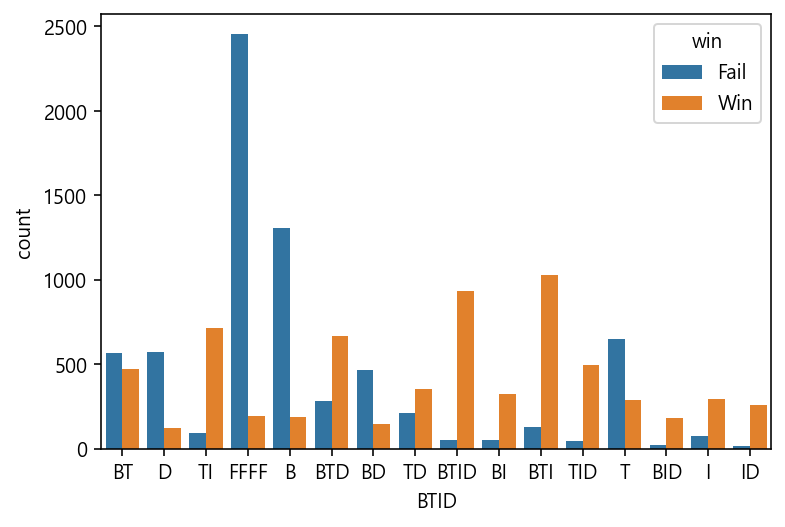

In [29]:
sns.countplot(data=chal_teams_df1, x="BTID", hue="win")

# BTID 컬럼 글자 수 기준 오름차순으로 정렬

In [50]:
chal_teams_df2 = chal_teams_df1.sort_values(by=["BTID"],key=lambda x:x.str.len())
chal_teams_df2

,win,firstBlood,firstTower,firstInhibitor,firstDragon,BTID
27873,Win,False,False,True,False,I
13960,Fail,True,False,False,False,B
4167,Fail,False,False,False,True,D
4168,Fail,False,True,False,False,T
4169,Fail,True,False,False,False,B
...,...,...,...,...,...,...
2590,Win,True,True,True,True,BTID
2588,Win,True,True,True,True,BTID
5428,Win,True,True,True,True,BTID
17994,Fail,False,False,False,False,FFFF


In [163]:
xlabels = list(chal_teams_df2['BTID'].unique())

['I',
 'B',
 'D',
 'T',
 'BT',
 'TD',
 'BI',
 'TI',
 'BD',
 'ID',
 'TID',
 'BTI',
 'BID',
 'BTD',
 'BTID',
 'FFFF']

# 각 유형별 승/패 데이터 그래프(수정 후)

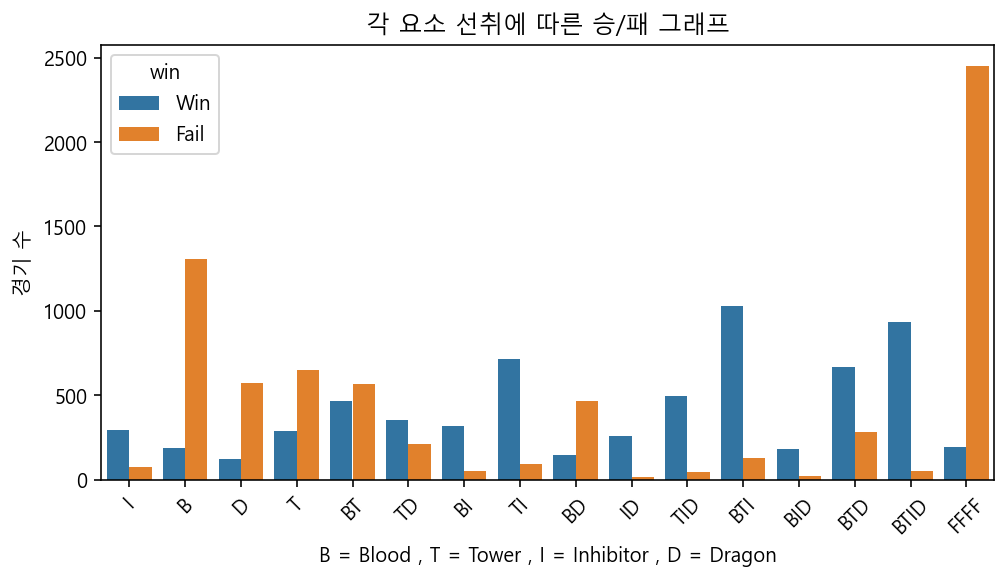

In [146]:
chart1 = plt.subplots(figsize=(8,4))
chart1 = sns.countplot(data=chal_teams_df2, x="BTID", hue="win")

chart1.set_title('각 요소 선취에 따른 승/패 그래프')
chart1.set_xlabel('B = Blood , T = Tower , I = Inhibitor , D = Dragon')
chart1.set_ylabel('경기 수')
chart1.set_xticklabels(labels = xlabels, rotation=45)

plt.show()

## 크기 순서대로 나열

In [140]:
xlabels_value = list(chal_teams_df1['BTID'].value_counts().index)

['FFFF',
 'B',
 'BTI',
 'BT',
 'BTID',
 'BTD',
 'T',
 'TI',
 'D',
 'BD',
 'TD',
 'TID',
 'BI',
 'I',
 'ID',
 'BID']

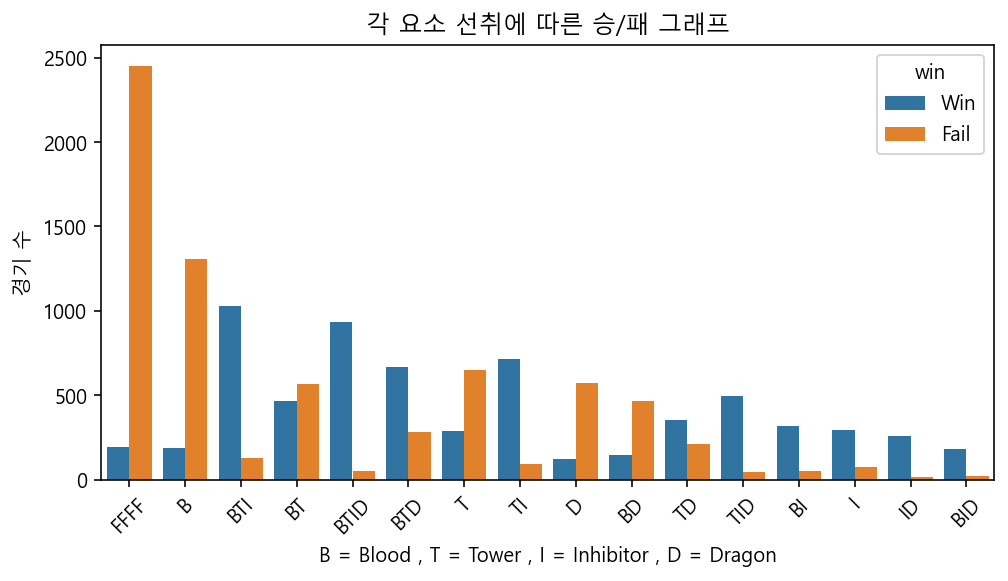

In [160]:
chart1 = plt.subplots(figsize=(8,4))
chart1 = sns.countplot(data=chal_teams_df2, x="BTID", hue="win",order =xlabels_value )

chart1.set_title('각 요소 선취에 따른 승/패 그래프')
chart1.set_xlabel('B = Blood , T = Tower , I = Inhibitor , D = Dragon')
chart1.set_ylabel('경기 수')
chart1.set_xticklabels(labels = xlabels_value, rotation=45)

plt.show()

# 각 유형 별 승리 데이터 그래프

## BTI ( firstBlood + Tower + Inhibitor) 를 얻은 게임이 가장 승리가 많음
## BTID ( 선취점+ 타워 +억제기 +용) 모두 얻은 팀의 승리가 가장 많을 것이라 예측했으나 다른 결과

In [32]:
chal_teams_win_df = chal_teams_df2[chal_teams_df2['win'] == 'Win']
chal_teams_win_df

,win,firstBlood,firstTower,firstInhibitor,firstDragon,BTID
27873,Win,False,False,True,False,I
13952,Win,False,True,False,False,T
4179,Win,False,False,False,True,D
4180,Win,False,False,True,False,I
4182,Win,False,False,True,False,I
...,...,...,...,...,...,...
2592,Win,True,True,True,True,BTID
2590,Win,True,True,True,True,BTID
2588,Win,True,True,True,True,BTID
5428,Win,True,True,True,True,BTID


In [118]:
chal_teams_win_df = chal_teams_win_df.sort_values(by=["BTID"],key=lambda x:x.str.len())
chal_teams_win_df['BTID'].unique()

array(['I', 'D', 'T', 'B', 'TD', 'TI', 'BI', 'BT', 'ID', 'BD', 'BID',
       'BTD', 'BTI', 'TID', 'BTID', 'FFFF'], dtype=object)

In [164]:
xlabels_win1 = list(chal_teams_win_df['BTID'].unique())

['I',
 'D',
 'T',
 'B',
 'TD',
 'TI',
 'BI',
 'BT',
 'ID',
 'BD',
 'BID',
 'BTD',
 'BTI',
 'TID',
 'BTID',
 'FFFF']

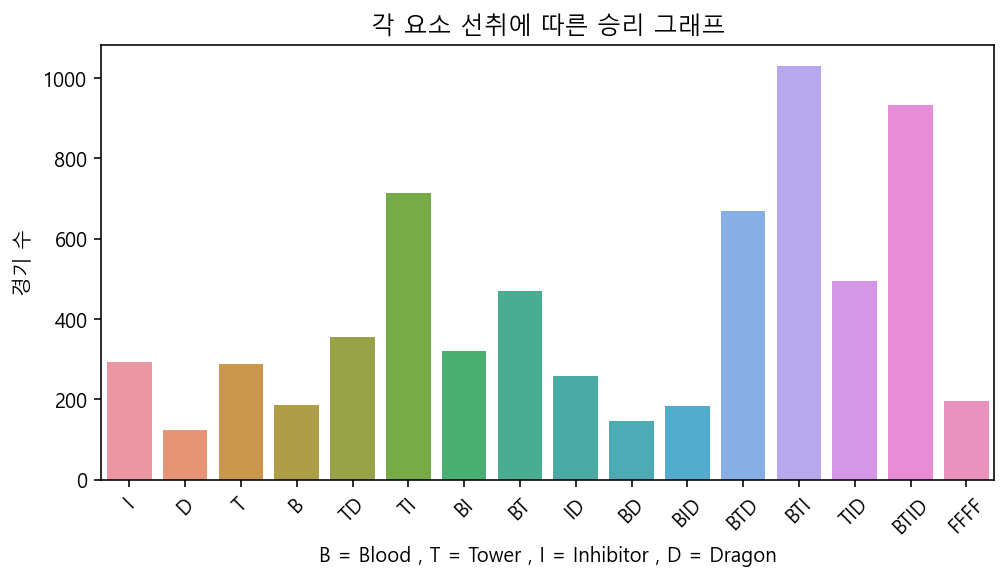

In [165]:
chart2 = plt.subplots(figsize=(8,4))
chart2 = sns.countplot(data=chal_teams_win_df, x="BTID")

chart2.set_title('각 요소 선취에 따른 승리 그래프')
chart2.set_xlabel('B = Blood , T = Tower , I = Inhibitor , D = Dragon')
chart2.set_ylabel('경기 수')
chart2.set_xticklabels(labels = xlabels_win1, rotation=45)
plt.show()

## 크기순서대로 나열

In [152]:
chal_teams_win_df['BTID'].value_counts().index

Index(['BTI', 'BTID', 'TI', 'BTD', 'TID', 'BT', 'TD', 'BI', 'I', 'T', 'ID',
       'FFFF', 'B', 'BID', 'BD', 'D'],
      dtype='object')

In [162]:
chal_teams_win_df['BTID'].value_counts()

BTI     1031
BTID     932
TI       715
BTD      669
TID      494
BT       469
TD       355
BI       321
I        292
T        289
ID       258
FFFF     196
B        186
BID      183
BD       147
D        123
Name: BTID, dtype: int64

In [161]:
xlabels_win = list(chal_teams_win_df['BTID'].value_counts().index)
xlabels_win

['BTI',
 'BTID',
 'TI',
 'BTD',
 'TID',
 'BT',
 'TD',
 'BI',
 'I',
 'T',
 'ID',
 'FFFF',
 'B',
 'BID',
 'BD',
 'D']

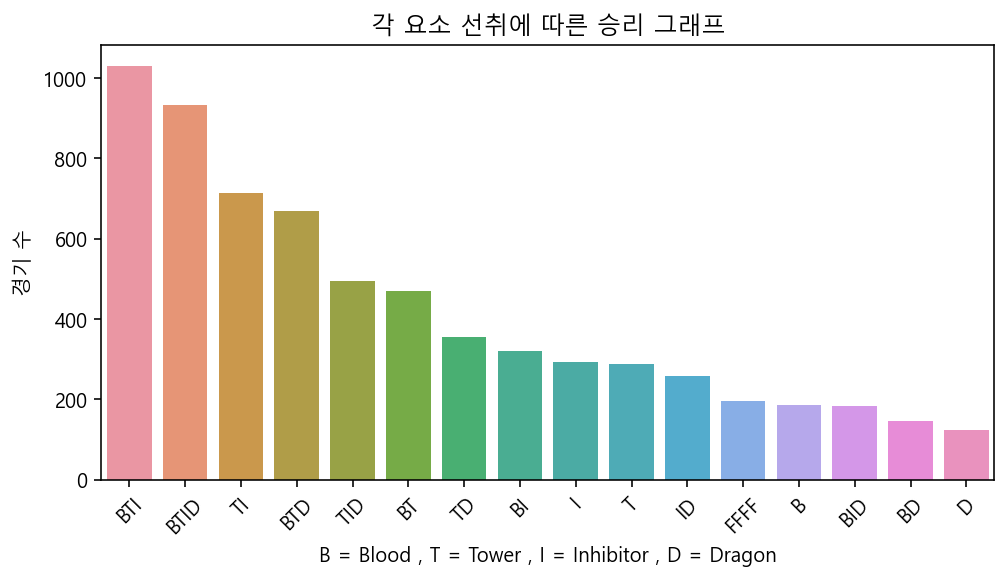

In [154]:
chart2 = plt.subplots(figsize=(8,4))
chart2 = sns.countplot(data=chal_teams_win_df, x="BTID",order = xlabels_win)

chart2.set_title('각 요소 선취에 따른 승리 그래프')
chart2.set_xlabel('B = Blood , T = Tower , I = Inhibitor , D = Dragon')
chart2.set_ylabel('경기 수')
chart2.set_xticklabels(labels = xlabels_win, rotation=45)
plt.show()

# 각 유형 별 패배 데이터 그래프

In [34]:
chal_teams_lose_df = chal_teams_df2[chal_teams_df2['win'] == 'Fail']
chal_teams_lose_df

,win,firstBlood,firstTower,firstInhibitor,firstDragon,BTID
13960,Fail,True,False,False,False,B
4167,Fail,False,False,False,True,D
4168,Fail,False,True,False,False,T
4169,Fail,True,False,False,False,B
13958,Fail,True,False,False,False,B
...,...,...,...,...,...,...
18257,Fail,False,False,False,False,FFFF
18262,Fail,False,False,False,False,FFFF
18276,Fail,False,False,False,False,FFFF
18277,Fail,False,False,False,False,FFFF


In [131]:
xlabels3 = list(chal_teams_lose_df['BTID'].unique())

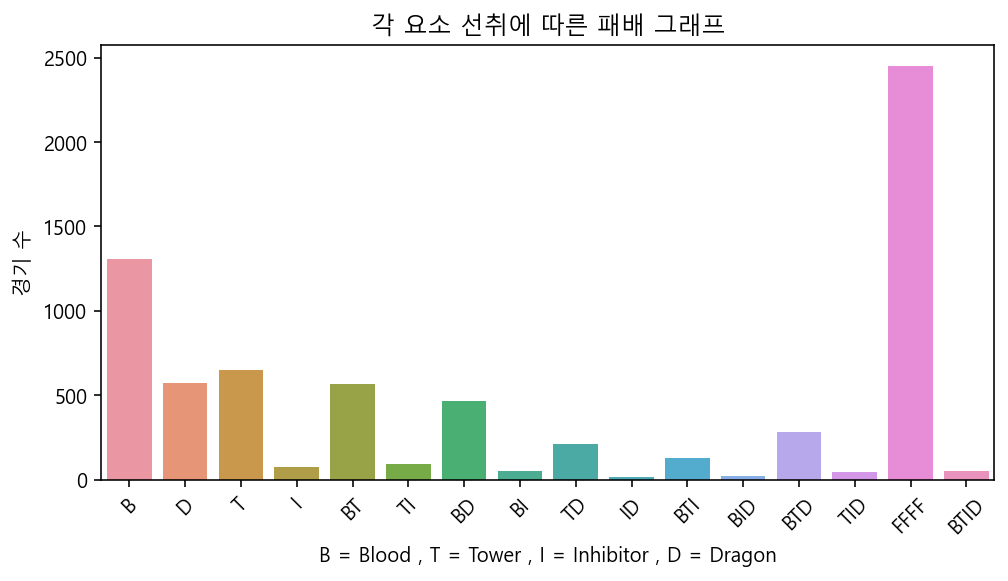

In [127]:
chart3 = plt.subplots(figsize=(8,4))
chart3 = sns.countplot(data=chal_teams_lose_df, x="BTID")

chart3.set_title('각 요소 선취에 따른 패배 그래프')
chart3.set_xlabel('B = Blood , T = Tower , I = Inhibitor , D = Dragon')
chart3.set_ylabel('경기 수')
chart3.set_xticklabels(labels = xlabels3, rotation=45)
plt.show()

## 크기순서대로 나열

In [157]:
xlabel_lose = list(chal_teams_lose_df['BTID'].value_counts().index)

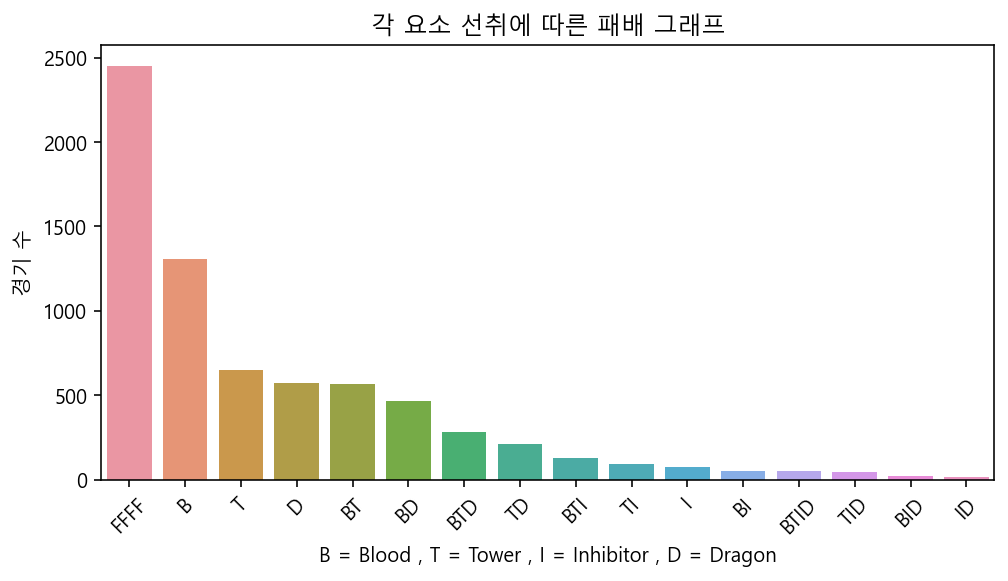

In [159]:
chart3 = plt.subplots(figsize=(8,4))
chart3 = sns.countplot(data=chal_teams_lose_df, x="BTID",order =xlabel_lose)

chart3.set_title('각 요소 선취에 따른 패배 그래프')
chart3.set_xlabel('B = Blood , T = Tower , I = Inhibitor , D = Dragon')
chart3.set_ylabel('경기 수')
chart3.set_xticklabels(labels = xlabel_lose, rotation=45)
plt.show()